In [98]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
from statsmodels.tsa.stattools import adfuller

In [ ]:
def plot_quantile_lines(time,X,H,alphas,process_name):

    n = len(X)
    fig, axes = plt.subplots(1,n,figsize=(15,5))

    for i in range(n):
        for j, a in enumerate(alphas):
            quantiles = np.quantile(X[i],a,axis=0)
            axes[i].plot(time,quantiles, label = r"$\alpha$ = "+ str(a))
        axes[i].set_title(f"H = {H[i]}")
        axes[i].set_xlabel("time")
        axes[i].set_ylabel("quantiles")
        axes[i].grid()
        axes[i].legend()


    plt.suptitle(f"Quantile lines for {process_name}")
    plt.show()

In [178]:
def plot_traj(time, pr, H, process):
  fig, axes = plt.subplots(1, 3, figsize = (15,5))

  for i in range(3):
      axes[i].set_title(f"H = {H[i]}")
      axes[i].set_xlabel("time")
      axes[i].set_ylabel("process")
      axes[i].grid()
      axes[i].plot(time, np.transpose(pr[i]))

  plt.suptitle(f"Sample trajectories of {process}")
  plt.show()

# Fractional Brownian motion

In [ ]:
def Sigma_fbm(time, H):
    n = len(time)
    sigma = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            s = time[i]
            t = time[j]
            gamma = (s**(2*H) + t**(2*H) - np.abs(t-s)**(2*H)) / 2
            sigma[i][j] = gamma
            sigma[j][i] = gamma
    return sigma

In [ ]:
def cholesky_gen(time, Sigma, N = 1, **kwargs):
    n = len(time)
    Sigma = Sigma(time, **kwargs)
    L = cholesky(Sigma)
    Z = np.random.normal(0, 1, (n, N))
    B = np.dot(L, Z)
    return B.T

In [ ]:
n = 2**10
N = 5
time = np.arange(0.01,n+0.01)

In [ ]:
fbm03 = cholesky_gen(time,Sigma_fbm,N,H=0.3)
fbm05 = cholesky_gen(time,Sigma_fbm,N,H=0.5)
fbm07 = cholesky_gen(time,Sigma_fbm,N,H=0.7)

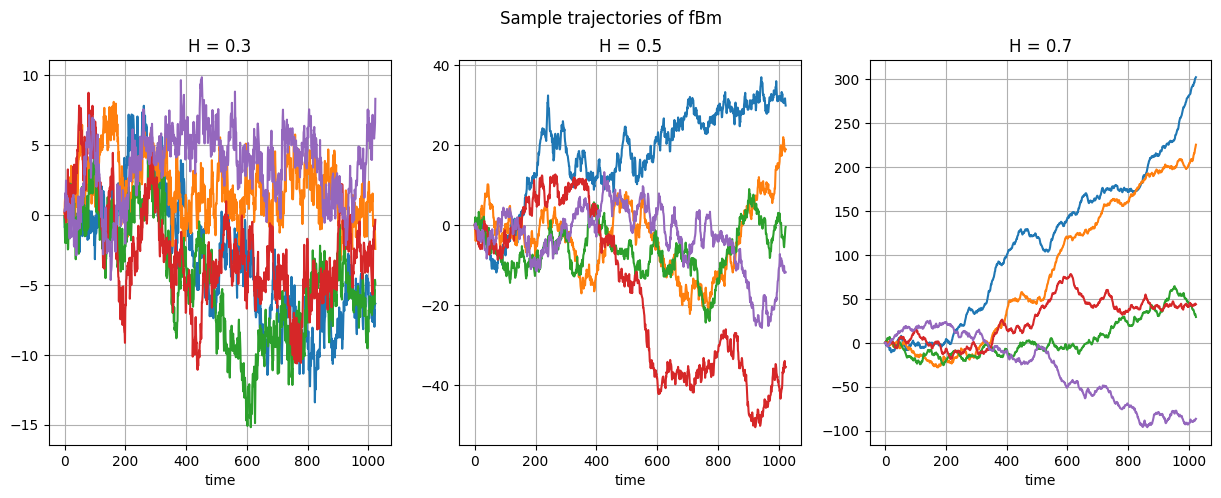

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
H = [0.3,0.5,0.7]
B = [fbm03,fbm05,fbm07]

for i in range(3):
    axes[i].set_title(f"H = {H[i]}")
    axes[i].set_xlabel("time")
    axes[i].grid()
    for j in range(N):
        axes[i].plot(time,B[i][j,:])

plt.suptitle("Sample trajectories of fBm")
plt.show()

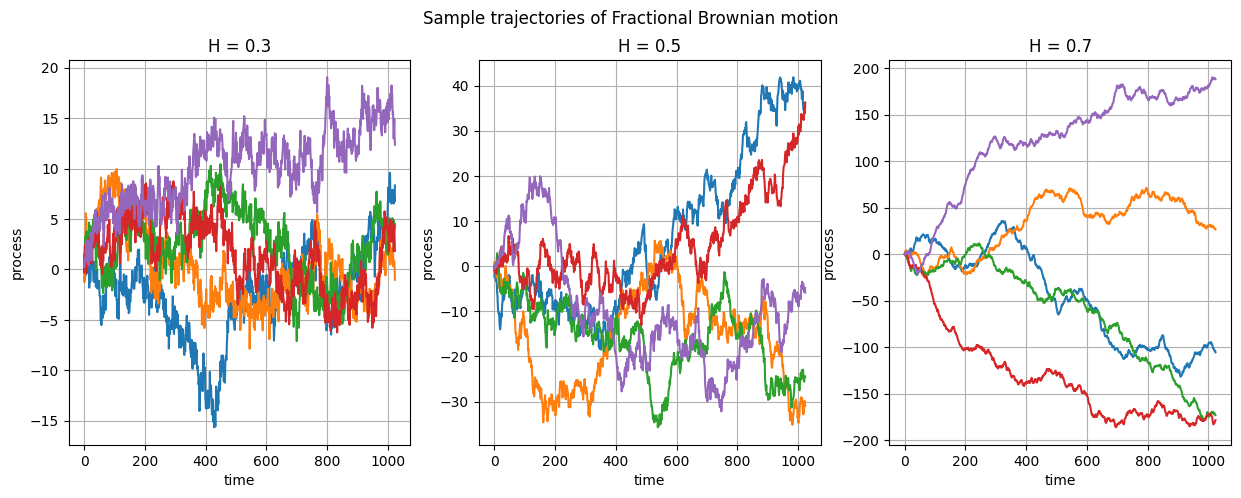

In [177]:
time = np.arange(0.01,n+0.01)
fbm = [cholesky_gen(time,Sigma_fbm,N,H=0.3), cholesky_gen(time,Sigma_fbm,N,H=0.5), cholesky_gen(time,Sigma_fbm,N,H=0.7)]
H = [0.3,0.5,0.7]
plot_traj(time, fbm, H, "Fractional Brownian motion")

In [ ]:
n = 2**10
time = np.arange(0.01,n+0.01)

In [ ]:
N = 1000

fbm03 = cholesky_gen(time,Sigma_fbm,N,H=0.3)
fbm05 = cholesky_gen(time,Sigma_fbm,N,H=0.5)
fbm07 = cholesky_gen(time,Sigma_fbm,N,H=0.7)

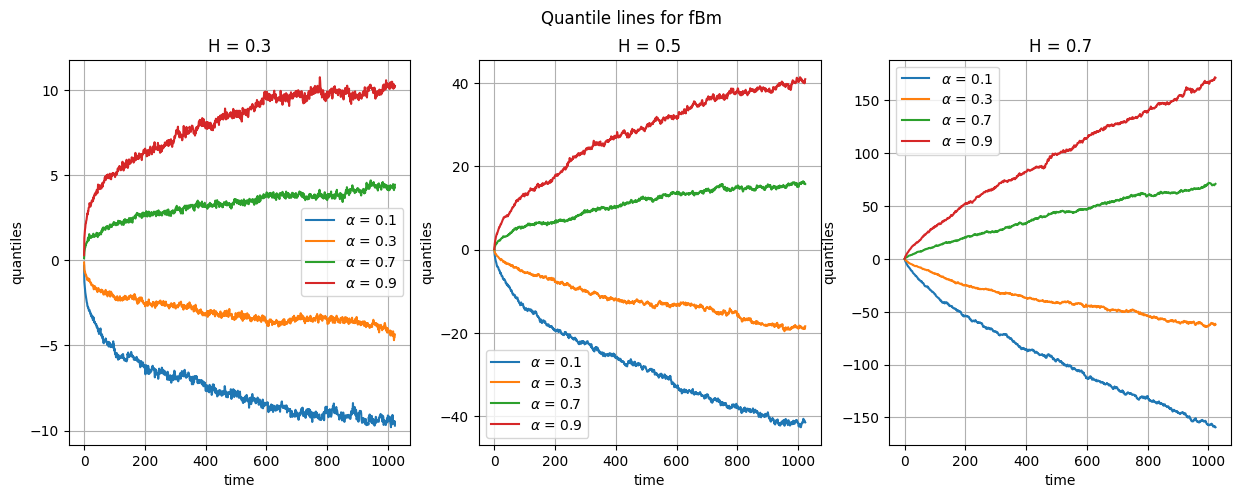

In [ ]:
H = [0.3,0.5,0.7]
B = [fbm03,fbm05,fbm07]
alphas = [0.1, 0.3, 0.7, 0.9]
plot_quantile_lines(time,B,H,alphas,"fBm")

# Fractional Ornstein-Uhlenbeck


In [ ]:
def fou_gen(t,N,H):
    exp_t = np.exp(t)
    X = cholesky_gen(exp_t,Sigma_fbm,N=N,H=H)
    return np.exp(-H*t) * X

In [ ]:
time = np.arange(0,200,0.1)

In [ ]:
fou03 = fou_gen(time,N=3,H=0.3)
fou05 = fou_gen(time,N=3,H=0.5)
fou07 = fou_gen(time,N=3,H=0.7)

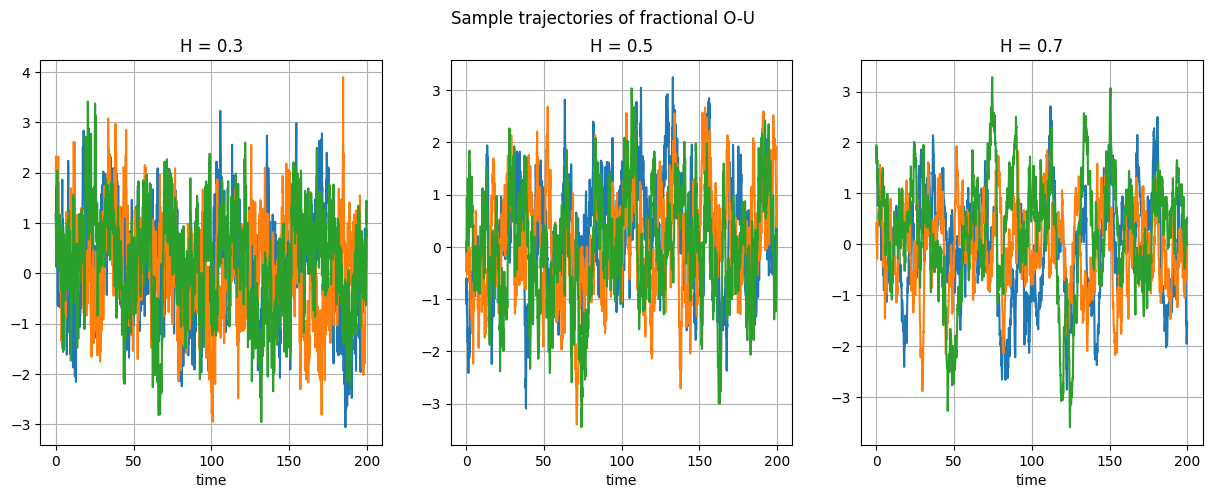

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
H = [0.3,0.5,0.7]
F = [fou03,fou05,fou07]

for i in range(3):
    axes[i].set_title(f"H = {H[i]}")
    axes[i].set_xlabel("time")
    axes[i].grid()
    for j in range(3):
        axes[i].plot(time,F[i][j,:])

plt.suptitle("Sample trajectories of fractional O-U")
plt.show()

In [ ]:
n = 2**8
time = np.arange(n)

In [ ]:
N = 1000
fou03 = fou_gen(time,N=N,H=0.3)
fou05 = fou_gen(time,N=N,H=0.5)
fou07 = fou_gen(time,N=N,H=0.7)

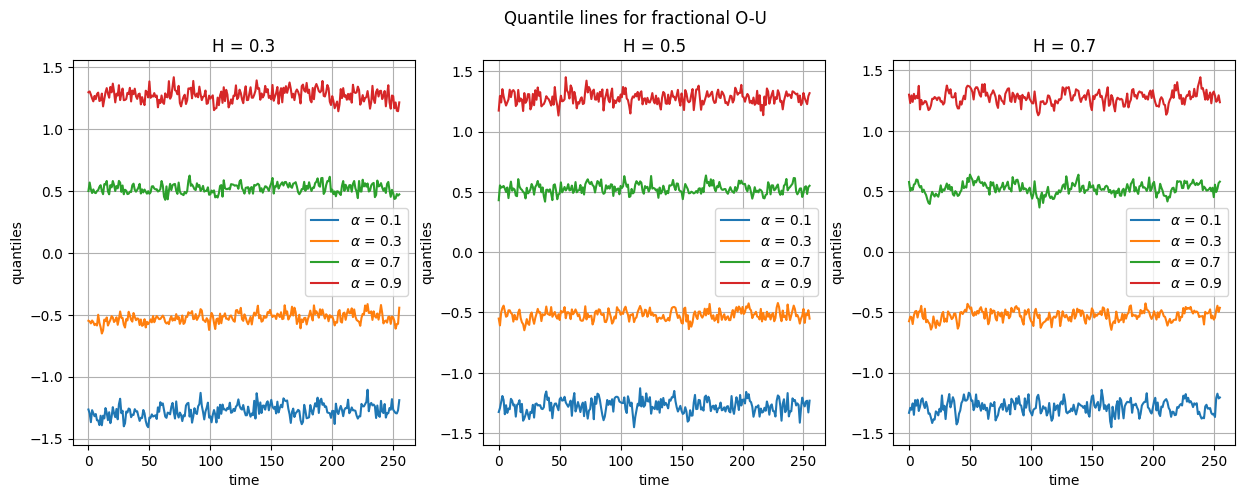

In [ ]:
H = [0.3,0.5,0.7]
F = [fou03,fou05,fou07]
alphas = [0.1, 0.3, 0.7, 0.9]
plot_quantile_lines(time,F,H,alphas,"fractional O-U")

# Fractional Levy stable motion

In [99]:
def alpha_stable_gen(alpha, beta, gamma, delta, n):
  """
  Function to generate independent alpha stable random variables

  params
  ------
  alpha - stability parameter (float)
  beta - skewness parameter (float)
  gamma - scale parameter (float)
  delta- location parameter (float)
  n - number of simulated independent random variables (int)

  returns
  -------
  array of length n of independent alpha stable random variables (np.array)
  """

  Theta = np.random.uniform(-np.pi/2, np.pi/2, n)
  W = np.random.exponential(1, n)
  theta_0 = np.arctan(beta * np.tan(np.pi * alpha/2))/alpha
  if alpha != 1:
      Z = np.sin(alpha * (theta_0 + Theta))/(np.cos(alpha * theta_0) * np.cos(Theta))**(1/alpha) * (np.cos(alpha * theta_0 + (alpha - 1) * Theta) / W)**((1-alpha) / alpha)
      X = gamma * Z + delta
  else:
      Z = 2/np.pi * ((np.pi/2 + beta * Theta) * np.tan(Theta) - beta * np.log((np.pi/2 * W * np.cos(Theta)) / (np.pi/2 + beta * Theta)))
      X = gamma * Z + delta + beta * 2/np.pi * gamma * np.log(gamma)
  return X

In [100]:
def simulate_process(Z, n, delta):
    X = [0]
    for k in range(n-1):
        X.append(X[k] + Z[k])
    return X

In [101]:
def alpha_stable_process_gen(n, delta, alpha, beta):
    gamma = delta**(1 / alpha)
    delt = 0
    Z = alpha_stable_gen(alpha, beta, gamma, delt, n)
    X = simulate_process(Z, n, delta)
    return X

In [127]:
def f_flsm(x, t, H, alpha):
  f = 0
  if t > x:
    f += (t - x)**(H - 1/alpha)
  if -x > 0:
    f -= (-x)**(H - 1/alpha)
  return f

In [138]:
def simulate_flsn(M1, M2, I, t, N, H, alpha, beta):
    s = np.linspace(-M1, M2, I)
    all_flsn = []
    for n in range(N):
      Z = alpha_stable_process_gen(I, 1, alpha, beta)
      incr = np.diff(Z)
      X = np.zeros(len(t))
      for i, t_i in enumerate(t):
          for j, s_j in enumerate(s[:-1]):
              X[i] += f_flsm(s_j, t_i, H, alpha) * incr[j]
          X[i] = np.sum(X[i])
      all_flsn.append(X)
    return all_flsn

In [150]:
T = 300
M1 = 100
M2 = T
I = M1 + M2 + 1
H = 0.5
alpha = 1.5
beta = 0.5
t = np.linspace(0, T, T+1)
N = 5
# Z = simulate_flsn(M1, M2, I, t, N, H, alpha, beta)

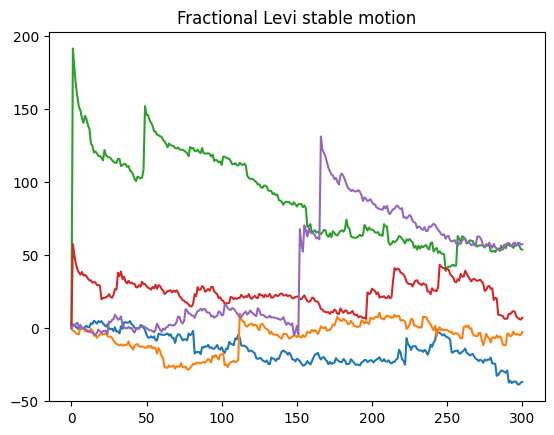

In [151]:
incr = []
# for i in range(N):
Z = simulate_flsn(M1, M2, I, t, N, H, alpha, beta)
    # incr.append(np.diff(Z[i]))

plt.plot(t, np.transpose(Z))
plt.title("Fractional Levi stable motion")
plt.show()

# plt.plot(t[:-1], np.transpose(incr))
# plt.title("Increments of fractional Levi stable motion")
# plt.show()

In [152]:
def plot_traj(time, pr, H, process):
  fig, axes = plt.subplots(1, 3, figsize = (15,5))

  for i in range(3):
      axes[i].set_title(f"H = {H[i]}")
      axes[i].set_xlabel("time")
      axes[i].set_ylabel("process")
      axes[i].grid()
      axes[i].plot(time, np.transpose(pr[i]))

  plt.suptitle(f"Sample trajectories of {process}")
  plt.show()

In [174]:
T = 300
M1 = 100
M2 = T
I = M1 + M2 + 1
H = [0.3, 0.5, 0.7]
alpha = 1.5
beta = 0.5
t = np.linspace(0, T, T+1)
N = 5
# Z = simulate_flsn(M1, M2, I, t, N, H, alpha, beta)

In [175]:
all_flsn = []
for h in H:
  all_flsn.append(simulate_flsn(M1, M2, I, t, N, h, alpha, beta))

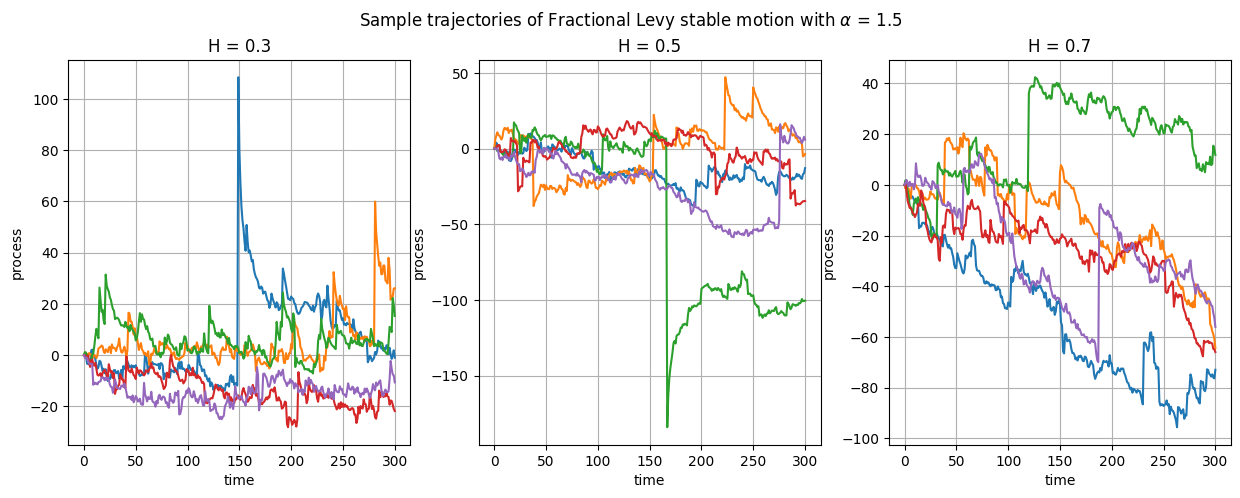

In [176]:
# r"$\alpha$ = "+ str(a)
plot_traj(t, all_flsn, H, rf"Fractional Levy stable motion with $\alpha$ = {alpha}")